Linear Regression Performance:
MSE : 5.8471395691655506
RMSE: 2.4180859308894607
R2  : 0.6906052678701994


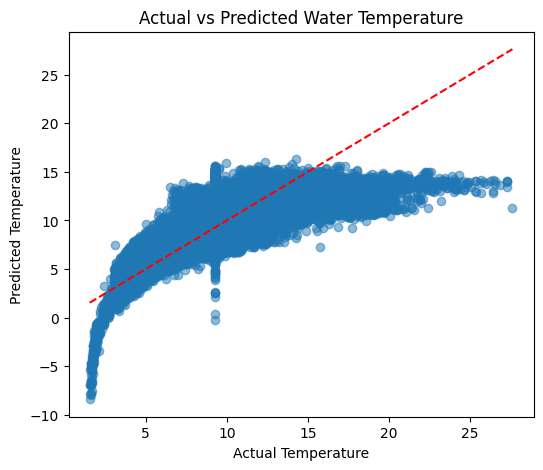

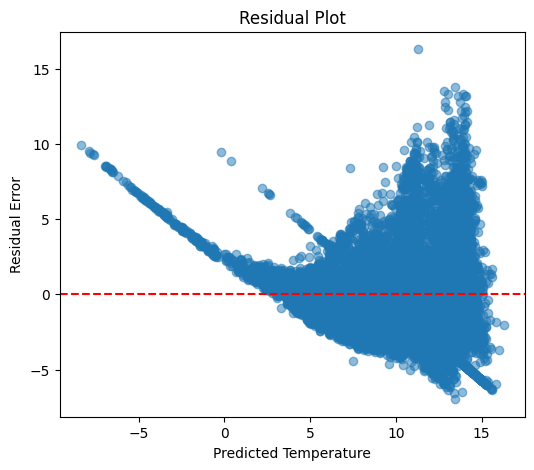

Ridge Regression R2: 0.6906052812493835
Lasso Regression R2: 0.6905701122418499

Lasso Feature Importance:
Depthm   -2.280906
Salnty    0.522726
O2ml_L    2.103514
dtype: float64


In [1]:
#SCENARIO 1: Predict Ocean Water Temperature
#Sudhiksha 24BAD117

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("bottle.csv", low_memory=False)
df.columns = df.columns.str.strip()
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'

df = df[features + [target]]
df.fillna(df.mean(), inplace=True)
X = df[features]
y = df[target]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual Error")
plt.title("Residual Plot")
plt.show()

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Regression R2:", r2_score(y_test, lasso_pred))
lasso_coef = pd.Series(lasso.coef_, index=features)
print("\nLasso Feature Importance:")
print(lasso_coef)


Processing file: LICI - minute ata.csv

--- Performance Metrics ---
Accuracy : 0.5847919655667145
Precision: 0.9752066115702479
Recall   : 0.0392156862745098
F1-Score : 0.07539936102236422
ROC-AUC  : 0.8772615084142508
Confusion Matrix:
 [[3958    3]
 [2891  118]]


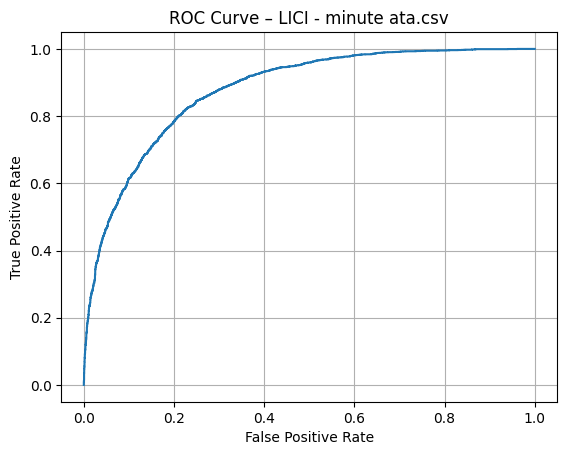

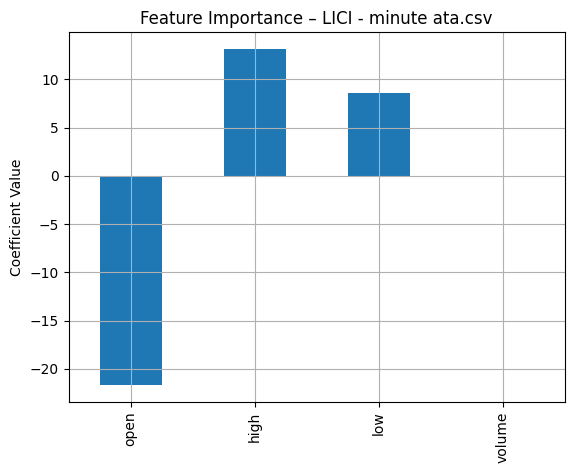


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Accuracy: 0.7517934002869441

Processing file: LICI - 3 minute data.csv

--- Performance Metrics ---
Accuracy : 0.5927099841521395
Precision: 0.9868421052631579
Recall   : 0.06805807622504537
F1-Score : 0.1273344651952462
ROC-AUC  : 0.8997794573732454
Confusion Matrix:
 [[1421    1]
 [1027   75]]


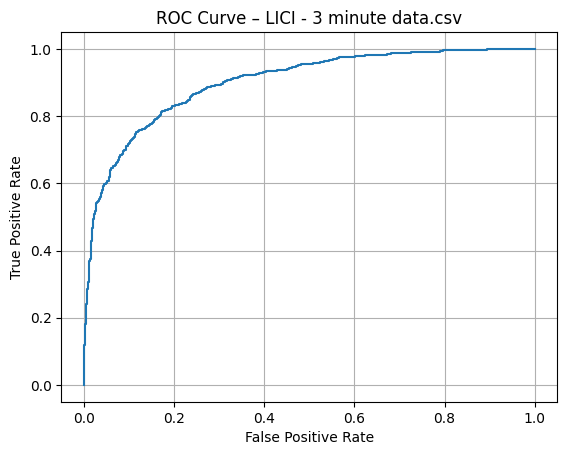

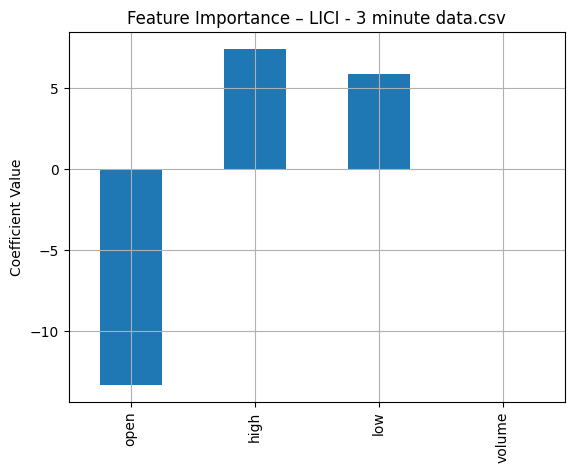


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Accuracy: 0.7781299524564184

Processing file: LICI - 5 minute data.csv
Required columns missing → Skipping file

Processing file: LICI - 10 minute data.csv

--- Performance Metrics ---
Accuracy : 0.5888738127544098
Precision: 1.0
Recall   : 0.013029315960912053
F1-Score : 0.02572347266881029
ROC-AUC  : 0.8679569729565941
Confusion Matrix:
 [[430   0]
 [303   4]]


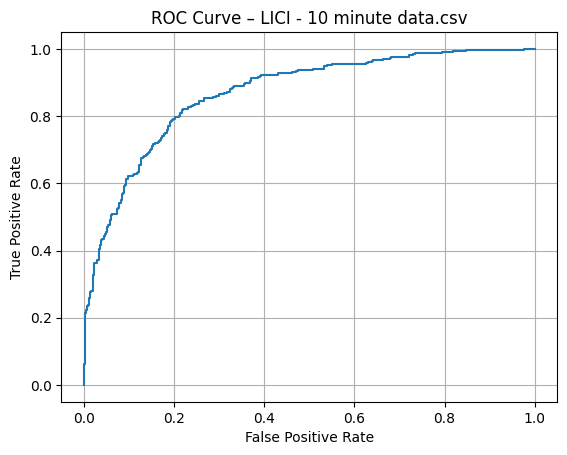

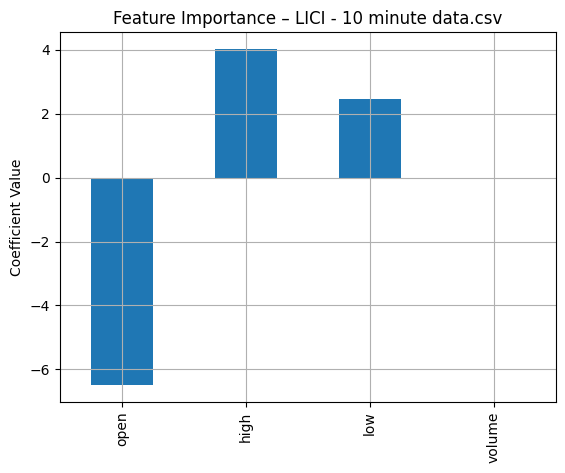


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Accuracy: 0.6974219810040706

Processing file: LICI - Daily data.csv
Required columns missing → Skipping file

All files processed successfully.


In [2]:
# SUDHIKSHA 24BAD117
# SCENARIO 2 – MULTI-FILE VERSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)

files = [
    "LICI - minute ata.csv",
    "LICI - 3 minute data.csv",
    "LICI - 5 minute data.csv",
    "LICI - 10 minute data.csv",
    "LICI - Daily data.csv"
]


def find_col(df, possible):
    for name in possible:
        if name in df.columns:
            return name
    return None


for file in files:

    print("\n" + "="*50)
    print("Processing file:", file)

    df = pd.read_csv(file)
    df.columns = df.columns.str.strip().str.lower()

    open_col   = find_col(df, ['open'])
    high_col   = find_col(df, ['high'])
    low_col    = find_col(df, ['low'])
    close_col  = find_col(df, ['close', 'adj close', 'adj_close'])
    volume_col = find_col(df, ['volume'])

    if None in [open_col, high_col, low_col, close_col, volume_col]:
        print("Required columns missing → Skipping file")
        continue

    df['price_movement'] = np.where(df[close_col] > df[open_col], 1, 0)
    df = df[[open_col, high_col, low_col, volume_col, 'price_movement']].dropna()

    X = df[[open_col, high_col, low_col, volume_col]]
    y = df['price_movement']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    cm   = confusion_matrix(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_prob)

    print("\n--- Performance Metrics ---")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-Score :", f1)
    print("ROC-AUC  :", auc)
    print("Confusion Matrix:\n", cm)


    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {file}")
    plt.grid()
    plt.show()

    # Feature Importance
    importance = pd.Series(model.coef_[0], index=X.columns)

    plt.figure()
    importance.plot(kind="bar")
    plt.title(f"Feature Importance – {file}")
    plt.ylabel("Coefficient Value")
    plt.grid()
    plt.show()


    # Hyperparameter tuning
    param_grid = {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    }

    grid = GridSearchCV(
        LogisticRegression(max_iter=1000),
        param_grid,
        cv=5,
        scoring="accuracy"
    )

    grid.fit(X_train, y_train)

    print("\nBest Hyperparameters:", grid.best_params_)
    print("Tuned Accuracy:", accuracy_score(y_test, grid.best_estimator_.predict(X_test)))

print("\nAll files processed successfully.")